### Вычисление параметров СВД
http://www.russianarms.ru/forum/index.php?topic=8492.0

## Графики

In [1]:
import numpy as np
from matplotlib.pylab import *
import os
import imageio
import glob
from tqdm import tqdm
from matplotlib.patches import Polygon

default_kwars = dict(
    n_nodes = 100,
    x0 = 0.5,
    x1 = 2,
    n_ts = 100,
    t0 = 0,
    t1 = 20,
    vel = 1,
    p0 = 2  
)
def get_data(**kwargs):
    n_nodes = kwargs['n_nodes']
    x0 = kwargs['x0']
    x1 = kwargs['x1']
    n_ts = kwargs['n_ts']
    t0 = kwargs['t0']
    t1 = kwargs['t1']
    vel = kwargs['vel']
    p0 = kwargs['p0']
    xs = []
    ps = []
    ts = []
    s = None
    for t in np.linspace(t0, t1, n_ts):
        ts.append(t)
        x2 = x1 + vel*t
        xss = np.linspace(x0, x2, n_nodes)
        xs.append(xss)
        pss = np.sin(xss+t) + p0
        s1 = np.sum(pss[:-1]*(xss[1:] - xss[:-1]))
        if s is None:
            s = s1
        pss *= s/s1
        ps.append(pss)
    return ts, xs, ps 

# ts, xs, ps = get_data(**default_kwars)

def savefig(ts, xs, ps, i, fname=None, **kwargs):
    # f0 = figure(num = 0, figsize = (6, 4))#, dpi = 100)
    f0 = figure(num = 0, figsize = (14, 6))
    ax01 = subplot2grid((3, 7), (0, 0), colspan=2, rowspan=2)
    ax02 = subplot2grid((3, 7), (0, 5), colspan=2, rowspan=2)
    ax03 = subplot2grid((3, 7), (0, 2), colspan=3, rowspan=2)
    ax04 = subplot2grid((3, 7), (2, 2), colspan=3)

    # ax01.set_title('Position vs Time')
    # ax02.set_title('Velocity vs Time')
    # ax03.set_title('Position and Velocity vs Time')
    if 'xlim' in kwargs:
        xlim = kwargs['xlim']
        ax03.set_xlim(*xlim)
        ax04.set_xlim(*xlim)
    if 'plim' in kwargs:
        plim = kwargs['plim']
        ax03.set_ylim(*plim)
        ax01.set_ylim(*plim)
        ax02.set_ylim(*plim)
    plt.setp(ax03.get_xticklabels(), visible=False)
    plt.setp(ax03.get_yticklabels(), visible=False)
    plt.setp(ax04.get_yticklabels(), visible=False)

    ax03.tick_params(axis='both', which='both', length=0)
    ax04.tick_params(axis='y', length=0)

    ax02.yaxis.tick_right()

    ax01.grid(True)
    ax02.grid(True)
    ax03.grid(True)
    ax04.grid(True)

    
    ax03.plot(xs[i], ps[i],linewidth=2)
    def add_poly(a,b,col):
        ix = a
        iy = b
        verts = [(a[0], 0)] + list(zip(ix, iy)) + [(a[-1], 0)]
        poly = Polygon(verts, color=col, alpha=0.5)
        ax03.add_patch(poly) 
    add_poly(xs[i], ps[i], 'blue')
    
    def get_x_otn(ax, x):
        x0, x1 = ax.get_xlim()
        return (x-x0)/(x1-x0)

    def plot_sub(ax, ind_x, col, where):
        data = []
        tss = []
        for j in range(i+1):
            tss.append(ts[j])
            data.append(ps[j][ind_x])
        ax.plot(tss, data, color=col,linewidth=2)
        ax.scatter(tss[-1], data[-1], color=col)
        ax03.scatter(xs[i][ind_x], ps[i][ind_x], color=col)
        if where == 'left':
            ax.axhline(y=data[-1], xmin=get_x_otn(ax, tss[-1]), xmax=1.05,c=col,linewidth=1,zorder=0, clip_on=False)
            ax03.axhline(y=data[-1], xmin=-0.05, xmax=get_x_otn(ax03, xs[i][ind_x]),c=col,linewidth=1,zorder=0, clip_on=False)
        else:
            ax.axhline(y=data[-1], xmin=-0.05, xmax=get_x_otn(ax, tss[-1]),c=col,linewidth=1,zorder=0, clip_on=False)
            ax03.axhline(y=data[-1], xmin=get_x_otn(ax03, xs[i][ind_x]), xmax=1.05,c=col,linewidth=1,zorder=0, clip_on=False)

    for ind_x, col in zip(kwargs['inds_left'], kwargs['colors_left']):
        plot_sub(ax01, ind_x, col, where='left')
    for ind_x, col in zip(kwargs['inds_right'], kwargs['colors_right']):
        plot_sub(ax02, ind_x, col, where='right')  
        
    #draw barrel
    if 'barrel_xs' in kwargs:
        lw=3
        r=0.1
        x0, x1 = kwargs['barrel_xs']
        ax04.plot([x1,x0,x0,x1], [-r,-r,r,r], lw=lw, color='black')
        ax04.set_ylim(-2.5*r, 2.5*r)
        
        round_lw=4
        for j in kwargs['barrle_inds']:
            x = xs[i][j]
            ax04.plot([x,x], [-r,r], lw=round_lw, color='black',marker='o')
    if fname is not None:
        f0.savefig(os.getcwd()+'\\imgs\\'+fname)
    return f0

# savefig(ts,xs,ps,50,
#         xlim=(-l_kam-0.01,l_stv+0.01), 
#         plim=(0,np.max(ps)*1.1), 
#         inds_left=[22], 
#         inds_right=[-1], 
#         colors_left=['r'], 
#         colors_right=['g'],
#         barrel_xs=(-0.042, 0.414),
#        barrle_inds=[-1])
# plt.show()

# for i in tqdm(range(1, 99)):    
#     savefig(ts,xs,ps, i, f'{i}.png',
#         xlim=(-l_kam-0.01,l_stv+0.01), 
#         plim=(0,np.max(ps)*1.1), 
#         inds_left=[bord_ind-1], 
#         inds_right=[bord_ind,-1], 
#         colors_left=['orange'], 
#         colors_right=['g', 'lime'],
#         barrel_xs=(-0.042, 0.414),
#         barrle_inds=[-1,bord_ind ]
#        )
# fpattern = os.getcwd()+'\\imgs\\*.png'
# def get_file_index(fn):
#     basename = os.path.basename(fn)
#     index = int(os.path.splitext(basename)[0])
#     return index
# files = glob.glob(fpattern)
# files.sort(key=get_file_index)

# images = []
# for file_name in tqdm(files):
#     images.append(imageio.imread(file_name))
# for i in range(30):
#     images.append(images[-1])
# imageio.mimsave(os.getcwd()+'\\movie_ak47_estaf_v4_7.gif', images, duration=0.05)

# for f in tqdm(files):
#     os.remove(f)

In [2]:
%pwd

'D:\\PyKas\\jupyters'

In [3]:
path_to_pb11 = os.path.dirname(os.getcwd())+'\\PB11'
path_to_pb11

'D:\\PyKas\\PB11'

## Не забываем врубить кластер:
`$ ipcluster start`

##### Иморт у всех!

In [5]:
from ipyparallel import Client

cl = Client()
lbv = cl.load_balanced_view()
print(f'Запущено {len(lbv)} ядер')

Запущено 8 ядер


In [6]:
cl[:].push({'path_to_pb11':path_to_pb11})

<AsyncResult: _push>

In [7]:
%%px --local
import os
print(path_to_pb11)

D:\PyKas\PB11
[stdout:0] D:\PyKas\PB11
[stdout:1] D:\PyKas\PB11
[stdout:2] D:\PyKas\PB11
[stdout:3] D:\PyKas\PB11
[stdout:4] D:\PyKas\PB11
[stdout:5] D:\PyKas\PB11
[stdout:6] D:\PyKas\PB11
[stdout:7] D:\PyKas\PB11


In [8]:
%%px --local
import sys

sys.path.append(path_to_pb11)

import importlib

import Invariants.Tube
import OneVelocity
from scipy import interpolate

importlib.reload(OneVelocity)
importlib.reload(Invariants.Tube)

from math import *
import sys
import time
import random as rnd

from Invariants.Tube import Tube

from Invariants.Plot import *
from OneVelocity.OvInit import ov_create_layer

import numpy as np

In [9]:
import json
# %load 
with open('gpowders.json') as f:
    all_powders = json.load(f)
cl[:].push({'all_powders':all_powders})
all_powders.keys()

dict_keys(['СФ 033', 'ВУ фл', 'ВТ', 'ВТМ', 'ВТХ-10', 'ВТХ-20', 'ВТД-25', '4\\1', '4\\1 фл', '4\\7', '4\\7 св', '4\\7 фл ВБП', '4\\7 ПТ-3 фл', '4\\7 Ц гр', '5\\1', '5\\1 х-10', '5\\1 х-20', '5\\1 д-20', '5\\1 д-25', '5\\7 св', '5\\7 н\\а', '5\\7 в\\а', '5\\7 Ц фл', '6\\7 гр', '6\\7 БП гр', '6\\7 фл В БП', '6\\7 П-5 БП фл', '6\\7 фл ', '7\\1', '7\\1 фл БП', '7\\7', '7\\14', '7\\1 УГ', '8\\1 тр', '8\\7', '8\\1 УГ', '9\\7', '9\\7 МН', '9\\7 БП', '11\\1 БП', '11\\7', '11\\1 УГ', '12\\1 Тр', '12\\1 тр БП', '12\\1 тр МН', '12\\7', '12\\7 В\\А', '12\\1 УГ', '14\\1 тр В\\А', '14\\7', '14\\7 В\\А', '14\\7 БП', '15\\1 тр В\\А', '15\\7', '16\\1 тр', '16\\1 тр В\\А', '17\\7', '18\\1 тр', '18\\1 тр БП', '22\\1 тр', '22\\7', '23\\7', '28\\1 тр', '37\\1 тр', 'НДТ-3 16\\1', 'НДТ-3 18\\1', 'НДТ-3 19\\1', 'НДТ-3 23\\1', 'НДТ-3 32\\1', 'НДТ-3 152\\57', 'ДГ-2 15\\1', 'ДГ-2 17\\1', 'ДГ-3 13\\1', 'ДГ-3 14\\1', 'ДГ-3 17\\1', 'ДГ-3 18\\1', 'ДГ-3 20\\1', 'ДГ-3 23\\1', 'ДГ-4 13\\1', '100\\56', '100\\70', '130\\5

In [10]:
for k in all_powders:
    if abs(all_powders[k]['f'] - 1.004) < 1e-6 \
        and abs(all_powders[k]['etta'] - 0.243) < 1e-6 \
        and  abs(all_powders[k]['I_k'] - 0.9) < 1e-6:
        print(all_powders[k])
        

{'name': 'ДГ-4 13\\1', 'f': 1.004, 'etta': 0.243, 'alpha_k': 1.085, 'T_1': 2655.0, 'ro': 1.52, 'I_k': 0.9, 'Z_k': 1.0, 'k_1': 1.0, 'lambda_1': 0.0, 'k_2': 0.0, 'lambda_2': 0.0, 'k_f': 0.00036, 'k_l': 0.0022}


#### Всякие вспомогательные функции

#### *Пороха*

In [11]:
%%px --local
powder_type = 'ВТ'
all_powders[powder_type]
powders_dict = dict(all_powders)

In [12]:
powders_dict[powder_type]

{'name': 'ВТ',
 'f': 0.996,
 'etta': 0.235,
 'alpha_k': 1.034,
 'T_1': 2820.0,
 'ro': 1.6,
 'I_k': 0.22,
 'Z_k': 1.112,
 'k_1': 1.799,
 'lambda_1': -0.448,
 'k_2': 0.9,
 'lambda_2': -2.455,
 'k_f': 0.0003,
 'k_l': 0.0016}

### Просто СВД

In [13]:
%%px --local
powder = powders_dict[powder_type]
q = 9.8e-3 # кг
omega = 2.8e-3 # кг 


d = 7.60e-3
s = pi*d**2/4

delta = 600
W_0 = omega/delta
l_kam = W_0/s
l_kam

0.10287023099199144

Out[0:4]: 0.10287023099199144

Out[1:4]: 0.10287023099199144

Out[2:4]: 0.10287023099199144

Out[3:4]: 0.10287023099199144

Out[4:4]: 0.10287023099199144

Out[5:4]: 0.10287023099199144

Out[6:4]: 0.10287023099199144

Out[7:4]: 0.10287023099199144

In [14]:
%%px --local
l_stv = 600e-3
pf_1 = 20e6
p_ign=5e6

tube = Tube([-l_kam, l_stv], [d, d])
cell_dx = 0.0005
ro1 = delta
x_left1 = -l_kam
x_right1 = 0
n_cells = int(ceil((x_right1 - x_left1) / cell_dx))
const_powder1 = {'covolume': powder['alpha_k'],
                'R': powder['f']*10**6/powder['T_1'],
                'gamma': powder['etta']+1,
                'param_powder': dict(powder),
                'nu': 1}
init_const_powder1 = {'ro': ro1,
                     't_init': 0}
grid_powder1 = {'name': 'powder',
               'n_cells': n_cells,
               'consts': const_powder1,
               'type': 'powder',
               'init_const': init_const_powder1,
               'xl': x_left1,
               'xr': x_right1,
               'vl': 0.0,
               'vr': 0.0}
print(f'ro = {ro1}')

ro = 600
[stdout:0] ro = 600
[stdout:1] ro = 600
[stdout:2] ro = 600
[stdout:3] ro = 600
[stdout:4] ro = 600
[stdout:5] ro = 600
[stdout:6] ro = 600
[stdout:7] ro = 600


In [15]:
%%px --local
lr1 = ov_create_layer(grid_powder1, tube)

In [16]:
%%px --local
def get_border(layer, tau, m1, pf_1):
    p = layer.p[-1]
    v = layer.V[-1]
    x = layer.x[-1]
    tube = layer.tube
    s = float(tube.get_S(x))
    pa = 101325.0 * 4
    if p > pf_1 or abs(v) > 1E-3:
        f1 = (p - pa) * s*0.9
        v1 = v + (f1 / m1)*tau
        x1 = x + v1 * tau
        return x1, v1
    else:
        return x, v

def calc(lr0):
    layers = [lr0]
    courant_number = 0.4
    while True:
        layer = layers[-1]
        if l_stv < layer.x[-1]:
            break
        if layer.time >= 0.1:
            return -9999
        tau = layer.time_step() *courant_number# Вычисление шага по времени

        x1, v1 = get_border(layer, tau, q, pf_1)

        layers.append(layer.euler_step_new(tau, x_left1, 0, x1, v1, True))
        layer.ro, layer.u, layer.e, layer.z = layer.get_param(layer.q)
    return layers

In [17]:
%%px --local
lrs = calc(lr1)
len(lrs[-1].V),len(lrs[-1].x),len(lrs[-1].p),len(lrs[-1].ro),len(lrs[-1].x_c)

(207, 207, 206, 206, 206)

Out[0:8]: (207, 207, 206, 206, 206)

Out[1:8]: (207, 207, 206, 206, 206)

Out[2:8]: (207, 207, 206, 206, 206)

Out[3:8]: (207, 207, 206, 206, 206)

Out[4:8]: (207, 207, 206, 206, 206)

Out[5:8]: (207, 207, 206, 206, 206)

Out[6:8]: (207, 207, 206, 206, 206)

Out[7:8]: (207, 207, 206, 206, 206)

In [18]:
%%px --local
lrs[-1].V[-1]

837.7300124786003

Out[0:9]: 837.7300124786003

Out[1:9]: 837.7300124786003

Out[2:9]: 837.7300124786003

Out[3:9]: 837.7300124786003

Out[4:9]: 837.7300124786003

Out[5:9]: 837.7300124786003

Out[6:9]: 837.7300124786003

Out[7:9]: 837.7300124786003

In [19]:
%%px --local
from scipy import interpolate
def x_p_foo(layer):
    return layer.x_c, layer.p

def x_v_foo(layer):
    return layer.x_c, layer.u

def get_ts_xs_values(layers, n_t, getter_foo):
    ts = []
    xs = []
    vals = []
    for lr in layers:
        x, val = getter_foo(lr)
        t = lr.time
        ts.append(t)
        xs.append(x)
        vals.append(val)
    ts = np.array(ts)
    xs = np.vstack(xs)
    vals = np.vstack(vals)
    
    tss = np.linspace(ts[0], ts[-1], n_t)
    xinterp = interpolate.interp1d(ts, xs, axis=0, bounds_error=False, fill_value=(xs[0], xs[-1]))
    valinterp = interpolate.interp1d(ts, vals, axis=0, bounds_error=False, fill_value=(vals[0], vals[-1]))
    return tss, xinterp(tss), valinterp(tss)

In [20]:
%%px --local
ts, xs, ps = get_ts_xs_values(lrs, 100, x_p_foo)

In [21]:
%%px --local
np.max(ps)

360276377.6770172

Out[0:12]: 360276377.6770172

Out[1:12]: 360276377.6770172

Out[2:12]: 360276377.6770172

Out[3:12]: 360276377.6770172

Out[4:12]: 360276377.6770172

Out[5:12]: 360276377.6770172

Out[6:12]: 360276377.6770172

Out[7:12]: 360276377.6770172

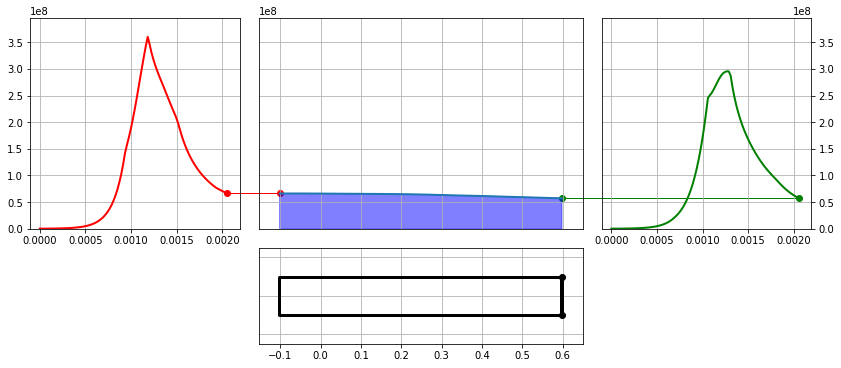

In [22]:
savefig(ts,xs,ps, 99,
        xlim=(-l_kam-0.05,l_stv+0.05), 
        plim=(0,np.max(ps)*1.1), 
        inds_left=[0], 
        inds_right=[-1], 
        colors_left=['r'], 
        colors_right=['g'],
        barrel_xs=(-l_kam, l_stv),
        barrle_inds=[-1 ])
plt.show()

100%|███████████████████████████████████████████████████████████████████████████████| 98/98 [00:00<00:00, 12280.90it/s]


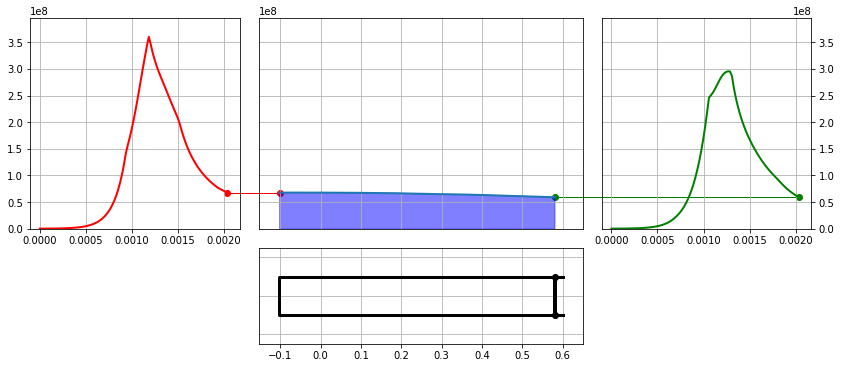

In [23]:
for i in tqdm(range(1, 99)):    
    savefig(ts,xs,ps, i, f'{i}.png',
        xlim=(-l_kam-0.05,l_stv+0.05), 
        plim=(0,np.max(ps)*1.1), 
        inds_left=[0], 
        inds_right=[-1], 
        colors_left=['r'], 
        colors_right=['g'],
        barrel_xs=(-l_kam, l_stv),
        barrle_inds=[-1 ]
       )
fpattern = os.getcwd()+'\\imgs\\*.png'
def get_file_index(fn):
    basename = os.path.basename(fn)
    index = int(os.path.splitext(basename)[0])
    return index
files = glob.glob(fpattern)
files.sort(key=get_file_index)

images = []
for file_name in tqdm(files):
    images.append(imageio.imread(file_name))
for i in range(30):
    images.append(images[-1])
imageio.mimsave(os.getcwd()+'\\gifs\\СВД_обычная.gif', images, duration=0.05)

for f in tqdm(files):
    os.remove(f)

In [24]:
ts, xs, ps = get_ts_xs_values(lrs, 100, x_v_foo)

100%|███████████████████████████████████████████████████████████████████████████████| 98/98 [00:00<00:00, 12261.49it/s]


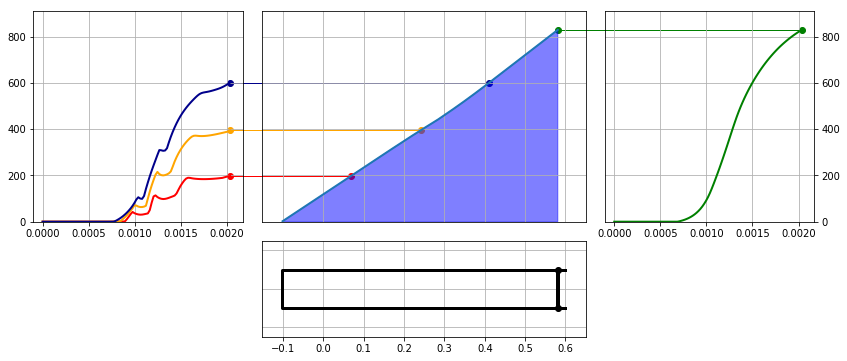

In [25]:
for i in tqdm(range(1, 99)):    
    savefig(ts,xs,ps, i, f'{i}.png',
        xlim=(-l_kam-0.05,l_stv+0.05), 
        plim=(0,np.max(ps)*1.1), 
        inds_left=[int(len(ps[0])/4),int(len(ps[0])/2),int(len(ps[0])*3/4)], 
        inds_right=[-1], 
        colors_left=['r','orange','darkblue'], 
        colors_right=['g'],
        barrel_xs=(-l_kam, l_stv),
        barrle_inds=[-1 ]
       )
fpattern = os.getcwd()+'\\imgs\\*.png'
def get_file_index(fn):
    basename = os.path.basename(fn)
    index = int(os.path.splitext(basename)[0])
    return index
files = glob.glob(fpattern)
files.sort(key=get_file_index)

images = []
for file_name in tqdm(files):
    images.append(imageio.imread(file_name))
for i in range(30):
    images.append(images[-1])
imageio.mimsave(os.getcwd()+'\\gifs\\СВД_обычная_V.gif', images, duration=0.05)

for f in tqdm(files):
    os.remove(f)

In [26]:
%%px --local
def get_layers_x_max(m1,m2,om1,om2):  
#     powder = powder
    q = m1 # кг
    omega = om1 # кг 
#     W_0 = W_0
    tube = Tube([-l_kam, l_stv], [d, d])
    cell_dx = 0.001
    ro1 = omega/(W_0*om1/(om1+om2))
    x_left1 = -l_kam
    x_right1 = -l_kam + l_kam*om1/(om1+om2)
    n_cells = int(ceil((x_right1 - x_left1) / cell_dx))
    
    const_powder1 = {'covolume': powder['alpha_k'],
                'R': powder['f']*10**6/powder['T_1'],
                'gamma': powder['etta']+1,
                'param_powder': dict(powder),
                'nu': 1}
    init_const_powder1 = {'ro': ro1}
#     print(ro1)
    grid_powder1 = {'name': 'powder',
                   'n_cells': n_cells,
                   'consts': const_powder1,
                   'type': 'powder',
                   'init_const': init_const_powder1,
                   'xl': x_left1,
                   'xr': x_right1,
                   'vl': 0.0,
                   'vr': 0.0}

    lr1 = ov_create_layer(grid_powder1, tube)

#     powder = powder
    q = m2 # кг
    omega = om2 # кг 

    ro1 = omega/(W_0*om2/(om1+om2))
    x_left1 = x_right1
    x_right1 = 0
    n_cells = int(ceil((x_right1 - x_left1) / cell_dx))
    const_powder1 = {'covolume': powder['alpha_k'],
                    'R': powder['f']*10**6/powder['T_1'],
                    'gamma': powder['etta']+1,
                    'param_powder': dict(powder),
                    'nu': 1}
    init_const_powder1 = {'ro': ro1}
#     print(ro1)
    grid_powder1 = {'name': 'powder',
                   'n_cells': n_cells,
                   'consts': const_powder1,
                   'type': 'powder',
                   'init_const': init_const_powder1,
                   'xl': x_left1,
                   'xr': x_right1,
                   'vl': 0.0,
                   'vr': 0.0}

    lr2 = ov_create_layer(grid_powder1, tube)
    
    layers = [lr1, lr2]
    l_min = -x_left1
    x_left01 = -l_kam
    return layers,l_min,x_left01,pf_1
    
    

In [27]:
%%px --local
def newton(tau, f, m, v0, x0):
    a = f / m
    return x0 + v0 * tau + 0.5 * a * tau ** 2, v0 + a * tau


def root_find(a, b, c, t1, t2):
    d = b ** 2 - 4 * a * c
    if d < 0:
        return t1
    d = sqrt(d)
    x1 = (-b + d) / (2 * a)
    x2 = (-b - d) / (2 * a)
    if t1 <= x1 <= t2:
        if t1 <= x2 <= t2:
            return min(x1, x2)
        return x1
    elif t1 <= x2 <= t2:
        return x2
    return max(x1, x2, t1)


def get_borders(layers, tau, l_min, m1, m2, pf_1):
    p0, p1, p2, pa = layers[0].p[-1], layers[1].p[0], layers[1].p[-1], 101325.0
    tube = layers[0].tube
    x1, v1 = layers[0].x[-1], layers[0].V[-1]
    x2, v2 = layers[1].x[-1], layers[1].V[-1]
    s1, s2 = tube.get_S([x1, x2])
    f1, f2 = (p0 - p1) * s1, (p2 - pa) * s2
    if abs(v2) < 1e-2 and abs(v1) < 1e-2:
        p01 = p0-p1 if p0-p1>0 else 0
        if abs(p01+p2-pa) < pf_1:
            return x1, v1, x2, v2
    
    x1_, v1_ = newton(tau, f1, m1, v1, x1)
    x2_, v2_ = newton(tau, f2, m2, v2, x2)
    if x2 - x1 >= l_min:
        return x1_, v1_, x2_, v2_

    tau_0 = root_find(0.5 * (f2 / m2 - f1 / m1), v2 - v1, x2 - x1 - l_min, 0, tau)
    x1, v1 = newton(tau_0, f1, m1, v1, x1)
    x2, v2 = newton(tau_0, f2, m2, v2, x2)
    v_s = (v1 * m1 + v2 * m2) / (m1 + m2)
    x1_, v1_ = newton(tau - tau_0, f1 + f2, m1 + m2, v_s, x1)
    x2_, v2_ = newton(tau - tau_0, f1 + f2, m1 + m2, v_s, x2)
    return x1_, v1_, x2_, v2_


def get_bord_before_ign2(layers, tau, m_sum, pf_1):
    p0, pa = layers[0].p[-1], 101325.0
    tube = layers[0].tube
    x1, v1 = layers[0].x[-1], layers[0].V[-1]
    s1 = float(tube.get_S(x1))
    f1 = (p0 - pa) * s1
    if abs(p0 - pa) > pf_1 or abs(v1) > 1E-2:
        x1_, v1_ = newton(tau, f1, m_sum, v1, x1)
    else:
        x1_, v1_ = x1, v1
    return x1_, v1_

def get_tmin_from_per(layers, m1):
    v_per = layers[0].V[-1]
    if abs(v_per) < 1e-3:
        v_per=1
    delta_p = abs(layers[0].p[-1] - layers[1].p[0])
    s = layers[0].tube.get_S(layers[0].x[-1])
    a = s*delta_p/m1
    dx_per = layers[1].dx[0]/2
    tau_0 = root_find(a, v_per, dx_per, dx_per/v_per*0.1, dx_per/v_per)
    return tau_0

def get_pmax(res):
    ps = np.array([max(np.max(lr1.p), np.max(lr2.p)) for lr1, lr2 in res])
    return np.max(ps)

def get_ts_xs_values(all_layers, n_t, getter_foo):
    ts,xs,vals = [],[],[]
    for layers in all_layers:
        xss = []
        valss = []
        for lr in layers:
            x, val = getter_foo(lr)
            t = lr.time
            xss.append(x)
            valss.append(val)
            bord_ind = len(xss[0])-1
        xss = np.hstack(xss)
        valss = np.hstack(valss)
        ts.append(t)
        xs.append(xss)
        vals.append(valss)
    tss = np.linspace(ts[0], ts[-1], n_t)
    xinterp = interpolate.interp1d(ts, xs, axis=0, bounds_error=False, fill_value=(xs[0], xs[-1]))
    valinterp = interpolate.interp1d(ts, vals, axis=0, bounds_error=False, fill_value=(vals[0], vals[-1]))
    return tss, xinterp(tss), valinterp(tss), bord_ind

In [28]:
%%px --local
def mainf(m1,m2,om1,om2,t_ignite,p_ign_perc,prnt=True):
    try:
        layers, l_min,x_left01,pf_1 = get_layers_x_max(m1,m2,om1,om2)

        courant_number = 0.4
        isignite = False
        
        all_layers = [layers]
        t_last, dt_print = 0, 1e-4
        
        layers[0].p[:] = p_ign if p_ign > 101325.0 else 101325.0
        layers[0].u[:] = layers[0].V[-1]
        layers[0].init_arr_q()
        layers[0].y = layers[0].powd.psi(layers[0].z)
        layers[0].e = layers[0].get_energ(layers[0].p, layers[0].ro, layers[0].y)

        layers[0].q = layers[0].init_arr_q()  # Список нумпи массивов q1, q2, q3, размерностями n

        layers[0].h = layers[0].get_arr_h()  # Список нумпи массивов h1, h2, h3, размерностями n
        
        while True:
            layers = all_layers[-1]
            if l_stv < layers[-1].x[-1]:
                break
            if layers[0].time >= 0.1:
                return -9999
            if np.isnan(layers[0].time):
                return 'Nan'

            layers1 = []

            if not isignite:
                if layers[0].time > t_ignite:
                    isignite = True
                    p_lefty = layers[0].p[-1]
                    #p_lefty * p_ign_perc
                    if prnt:
                        print(f"p_lefty = {p_lefty},   p_ign = {p_ign}")
                    layers[1].p[:] = p_ign if p_ign > 101325.0 else 101325.0
                    layers[1].u[:] = layers[0].V[-1]
                    layers[1].init_arr_q()
                    layers[1].y = layers[1].powd.psi(layers[1].z)
                    layers[1].e = layers[1].get_energ(layers[1].p, layers[1].ro, layers[1].y)

                    layers[1].q = layers[1].init_arr_q()  # Список нумпи массивов q1, q2, q3, размерностями n

                    layers[1].h = layers[1].get_arr_h()  # Список нумпи массивов h1, h2, h3, размерностями n

            if isignite:
                tau_arr = [l.time_step() for l in layers]
                tau_arr.append(get_tmin_from_per(layers, m1))
                tau = courant_number * min(tau_arr)  # Вычисление шага по времени

                x1, v1, x2, v2 = get_borders(layers, tau, l_min, m1, m2, pf_1)

                layers1.append(layers[0].euler_step_new(tau, x_left01, 0, x1, v1, True))
                layers1.append(layers[1].euler_step_new(tau, x1, v1, x2, v2, isignite))
            else:
                tau_arr = [l.time_step() for l in layers[:-1]]
                tau = courant_number * min(tau_arr)  # Вычисление шага по времени
                x1, v1 = get_bord_before_ign2(layers, tau, m1 + m2 + om2, pf_1)
                x2, v2 = x1 + l_min, v1
                layers1.append(layers[0].euler_step_new(tau, x_left01, 0, x1, v1, True))
                layers1.append(layers[1].move_to(tau, x1, v1, x1 + l_min))
                layers1[1].u[:] = layers1[0].V[-1]
                layers1[1].y = layers1[1].powd.psi(layers1[1].z)
                layers1[1].e = layers1[1].get_energ(layers1[1].p, layers1[1].ro, layers1[1].y)
                layers1[1].q = layers1[1].init_arr_q()  # Список нумпи массивов q1, q2, q3, размерностями n
                layers1[1].h = layers1[1].get_arr_h()  # Список нумпи массивов h1, h2, h3, размерностями n
            for layer in layers1:
                layer.ro, layer.u, layer.e, layer.z = layer.get_param(layer.q)
            all_layers.append(layers1)
            if layers[0].time > t_last + dt_print:
                if prnt:
                    print(f't = {layers[0].time}, v = {layers[1].V[-1]}, x = {layers[1].x[-1]}')
                t_last = layers[0].time
        return all_layers
   
    except Exception as e:
        print(e)
        return -9996    

In [29]:
%%px --local
omega

0.0028

Out[0:16]: 0.0028

Out[1:16]: 0.0028

Out[2:16]: 0.0028

Out[3:16]: 0.0028

Out[4:16]: 0.0028

Out[5:16]: 0.0028

Out[6:16]: 0.0028

Out[7:16]: 0.0028

In [204]:
res = mainf(m1=0.0025,
            m2=q,
            om1=2.9*0.2e-3,
            om2=2.9*0.8e-3,
            t_ignite=0.0000,
            p_ign_perc=0.9,prnt=True)

p_lefty = 5127476.514119043,   p_ign = 5000000.0
t = 0.00010199774507196066, v = 0.0, x = 0.0
t = 0.00020318381771671203, v = 3.3776512275627844, x = 5.30812099589394e-05
t = 0.0003038835086130487, v = 20.73061637260576, x = 0.0011603964889208458
t = 0.0004043147225336513, v = 56.62917622276834, x = 0.004828165672949288
t = 0.0005047406481522816, v = 129.241591766259, x = 0.013767087538378053
t = 0.0006048298250386017, v = 242.1832575687105, x = 0.0319559826102128
t = 0.0007048425286337182, v = 383.99933253352816, x = 0.06334577962972748
t = 0.0008052451053657207, v = 503.2004848630957, x = 0.10797163350186632
t = 0.0009054271159354136, v = 606.1299924506985, x = 0.16375935505799194
t = 0.0010057002616614017, v = 684.9378827423178, x = 0.22866136089263353
t = 0.0011057128396455421, v = 745.8182897886435, x = 0.300324843061364
t = 0.0012061667722953894, v = 796.274783375255, x = 0.3778512498505344
t = 0.0013065687712551135, v = 838.1797585601063, x = 0.459973554448431
t = 0.001406958360

In [205]:
res[-1][-1].V[-1]

890.1273149610232

In [206]:
get_pmax(res)

347898472.03850204

In [207]:
ts, xs, ps, bord_ind = get_ts_xs_values(res, 100, x_p_foo)

In [208]:
ps[-1][-1]

58864728.545565486

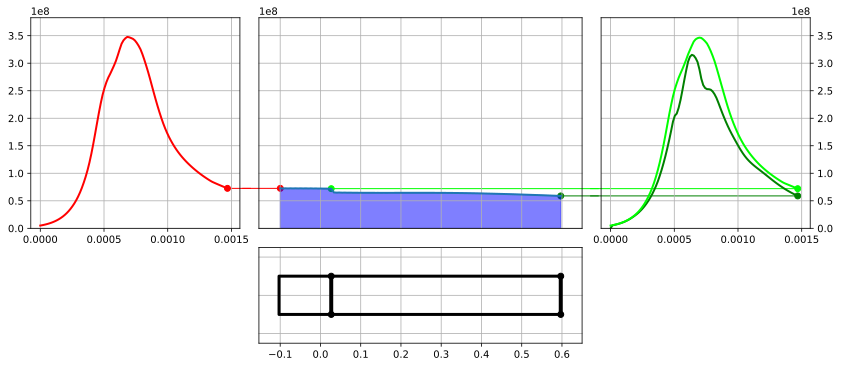

In [209]:
savefig(ts,xs,ps,99,
        xlim=(-l_kam-0.05,l_stv+0.05), 
        plim=(0,np.max(ps)*1.1), 
        inds_left=[0], 
        inds_right=[-1,bord_ind], 
        colors_left=['r'], 
        colors_right=['g', 'lime'],
        barrel_xs=(-l_kam, l_stv),
        barrle_inds=[-1,bord_ind ]
       )
plt.show()

100%|███████████████████████████████████████████████████████████████████████████████| 99/99 [00:00<00:00, 16620.08it/s]


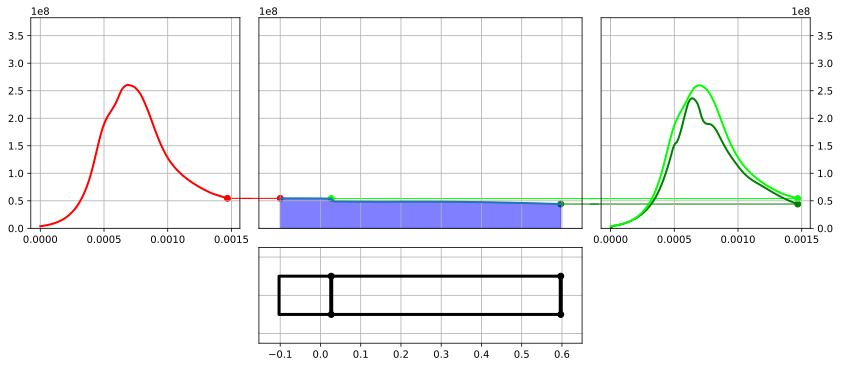

In [210]:
for i in tqdm(range(1, 100)):    
    savefig(ts,xs,ps*3/4, i, f'{i}.png',
        xlim=(-l_kam-0.05,l_stv+0.05), 
        plim=(0,np.max(ps)*1.1), 
        inds_left=[0], 
        inds_right=[-1,bord_ind], 
        colors_left=['r'], 
        colors_right=['g', 'lime'],
        barrel_xs=(-l_kam, l_stv),
        barrle_inds=[-1,bord_ind ]
       )
fpattern = os.getcwd()+'\\imgs\\*.png'
def get_file_index(fn):
    basename = os.path.basename(fn)
    index = int(os.path.splitext(basename)[0])
    return index
files = glob.glob(fpattern)
files.sort(key=get_file_index)

images = []
for file_name in tqdm(files):
    images.append(imageio.imread(file_name))
for i in range(30):
    images.append(images[-1])
imageio.mimsave(os.getcwd()+'\\gifs\\СВД_эстафета_p.gif', images, duration=0.05)

for f in tqdm(files):
    os.remove(f)

In [211]:
ts, xs, ps, bord_ind = get_ts_xs_values(res, 100, x_v_foo)

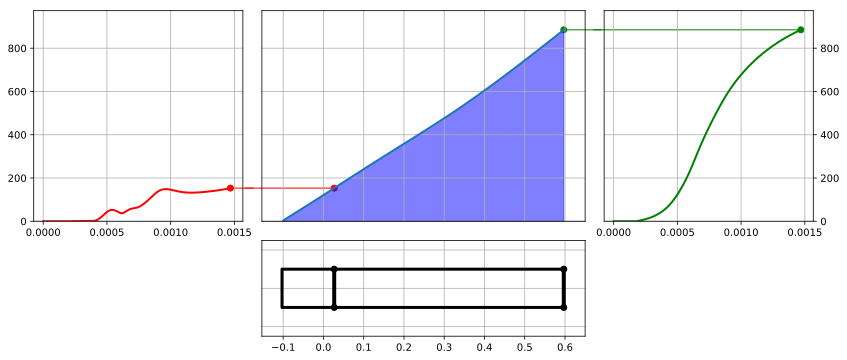

In [212]:
savefig(ts,xs,ps,99,
        inds_left=[bord_ind], 
        inds_right=[-1],       
        xlim=(-l_kam-0.05,l_stv+0.05), 
        plim=(0,np.max(ps)*1.1), 
        colors_left=['r'], 
        colors_right=['g'],
        barrel_xs=(-l_kam, l_stv),
        barrle_inds=[-1,bord_ind ]
       )
plt.show()

100%|███████████████████████████████████████████████████████████████████████████████| 99/99 [00:00<00:00, 12408.44it/s]


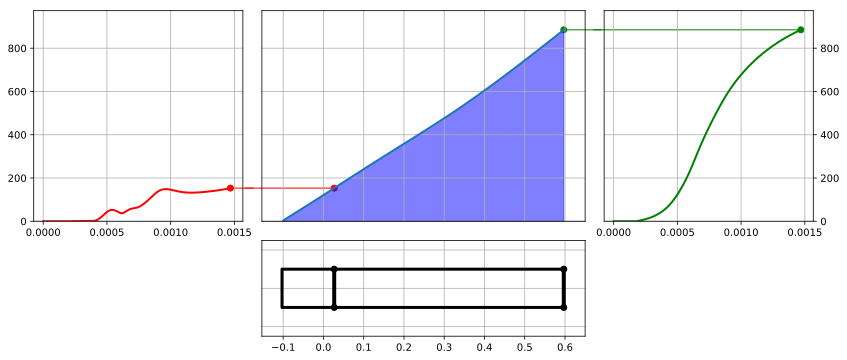

In [213]:
for i in tqdm(range(1, 100)):    
    savefig(ts,xs,ps, i, f'{i}.png',
        inds_left=[bord_ind], 
        inds_right=[-1],       
        xlim=(-l_kam-0.05,l_stv+0.05), 
        plim=(0,np.max(ps)*1.1), 
        colors_left=['r'], 
        colors_right=['g'],
        barrel_xs=(-l_kam, l_stv),
        barrle_inds=[-1,bord_ind ]
       )
fpattern = os.getcwd()+'\\imgs\\*.png'
def get_file_index(fn):
    basename = os.path.basename(fn)
    index = int(os.path.splitext(basename)[0])
    return index
files = glob.glob(fpattern)
files.sort(key=get_file_index)

images = []
for file_name in tqdm(files):
    images.append(imageio.imread(file_name))
for i in range(30):
    images.append(images[-1])
imageio.mimsave(os.getcwd()+'\\gifs\\СВД_эстафета_v.gif', images, duration=0.05)

for f in tqdm(files):
    os.remove(f)

In [40]:
%%px --local
res = mainf(m1=0.001,
            m2=q,
            om1=1.8e-3,
            om2=1.1e-3,
            t_ignite=0.0005,
            p_ign_perc=0.9,prnt=False)
res[-1][-1].V[-1]

752.3120863035832

Out[0:17]: 752.3120863035832

Out[1:17]: 752.3120863035832

Out[2:17]: 752.3120863035832

Out[3:17]: 752.3120863035832

Out[4:17]: 752.3120863035832

Out[5:17]: 752.3120863035832

Out[6:17]: 752.3120863035832

Out[7:17]: 752.3120863035832

In [41]:
%%px --local
def get_sol(perc_omega0, m_per, t_ign):
    om_sum = 2.9e-3
    om1 = om_sum * perc_omega0 /100
    om2 = om_sum - om1
    res = mainf(m1=m_per, m2=q, om1=om1, om2=om2, t_ignite=t_ign, p_ign_perc=0.1 ,prnt=False)
    v_d, p_max = 0, 0
    if isinstance(res, list):
        v_d, p_max = res[-1][-1].V[-1], get_pmax(res)
    return (perc_omega0, m_per, t_ign), (v_d, p_max)

In [ ]:
get_sol(70, 0.001, 0.000)

In [179]:
perc_omega0s = np.linspace(10,90,9)
perc_omega0s

array([10., 20., 30., 40., 50., 60., 70., 80., 90.])

In [180]:
m_pers = np.linspace(0.5e-3,5e-3,10)
m_pers

array([0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035, 0.004 ,
       0.0045, 0.005 ])

In [181]:
t_igns = np.linspace(0,0.0005,11)
t_igns

array([0.0e+00, 5.0e-05, 1.0e-04, 1.5e-04, 2.0e-04, 2.5e-04, 3.0e-04,
       3.5e-04, 4.0e-04, 4.5e-04, 5.0e-04])

In [182]:
all_vars = [(perc_omega0, m_per, t_ign) for perc_omega0 in perc_omega0s for m_per in m_pers for t_ign in t_igns]
len(all_vars), all_vars

(990,
 [(10.0, 0.0005, 0.0),
  (10.0, 0.0005, 5e-05),
  (10.0, 0.0005, 0.0001),
  (10.0, 0.0005, 0.00015000000000000001),
  (10.0, 0.0005, 0.0002),
  (10.0, 0.0005, 0.00025),
  (10.0, 0.0005, 0.00030000000000000003),
  (10.0, 0.0005, 0.00035),
  (10.0, 0.0005, 0.0004),
  (10.0, 0.0005, 0.00045000000000000004),
  (10.0, 0.0005, 0.0005),
  (10.0, 0.001, 0.0),
  (10.0, 0.001, 5e-05),
  (10.0, 0.001, 0.0001),
  (10.0, 0.001, 0.00015000000000000001),
  (10.0, 0.001, 0.0002),
  (10.0, 0.001, 0.00025),
  (10.0, 0.001, 0.00030000000000000003),
  (10.0, 0.001, 0.00035),
  (10.0, 0.001, 0.0004),
  (10.0, 0.001, 0.00045000000000000004),
  (10.0, 0.001, 0.0005),
  (10.0, 0.0015, 0.0),
  (10.0, 0.0015, 5e-05),
  (10.0, 0.0015, 0.0001),
  (10.0, 0.0015, 0.00015000000000000001),
  (10.0, 0.0015, 0.0002),
  (10.0, 0.0015, 0.00025),
  (10.0, 0.0015, 0.00030000000000000003),
  (10.0, 0.0015, 0.00035),
  (10.0, 0.0015, 0.0004),
  (10.0, 0.0015, 0.00045000000000000004),
  (10.0, 0.0015, 0.0005),
  (10.0, 

In [183]:
all_res = lbv.map(lambda tp: get_sol(*tp), all_vars,ordered=False)

In [184]:
all_res.ready()

False

In [203]:
from tqdm import tqdm_notebook
v_best, p_best = 0, 0
for r in tqdm_notebook(all_res):
    pars, res = r
    v, p = res 
    if v > v_best:
        v_best, p_best = v, p
        pars_best = pars
        print(f'V = {v_best} (p={p_best/1e5:.3f} атм)  {pars_best}')

V = 886.9932545895156 (p=3912.464 атм)  (10.0, 0.003, 0.0)
V = 887.0197490945811 (p=3807.457 атм)  (10.0, 0.004, 0.0)
V = 887.4324950228623 (p=3736.051 атм)  (10.0, 0.0045000000000000005, 0.0)
V = 887.7331279766169 (p=3666.135 атм)  (10.0, 0.005, 0.0)
V = 888.3290489134238 (p=3552.355 атм)  (20.0, 0.0015, 0.0)
V = 890.0254277032614 (p=3532.644 атм)  (20.0, 0.002, 0.0)
V = 890.1273149610232 (p=3478.985 атм)  (20.0, 0.0025, 0.0)



In [194]:
all_res.progress, len(all_res), all_res.progress/len(all_res)*100

(975, 990, 98.48484848484848)

In [195]:
# with open('svd3.json', 'w') as f:
#     json.dump({'all_res': all_res.result()}, f)


In [196]:
from copy import deepcopy

calced = deepcopy(all_res.result())
calced

[((10.0, 0.0005, 0.0), (0, 0)),
 ((10.0, 0.0005, 5e-05), (0, 0)),
 ((10.0, 0.0005, 0.0001), (0, 0)),
 ((10.0, 0.0005, 0.00015000000000000001), (0, 0)),
 ((10.0, 0.0005, 0.0002), (0, 0)),
 ((10.0, 0.0005, 0.00025), (0, 0)),
 ((10.0, 0.0005, 0.00030000000000000003), (0, 0)),
 ((10.0, 0.0005, 0.00035), (0, 0)),
 ((10.0, 0.0005, 0.0004), (0, 0)),
 ((10.0, 0.0005, 0.00045000000000000004), (0, 0)),
 ((10.0, 0.0005, 0.0005), (0, 0)),
 ((10.0, 0.001, 0.0), (0, 0)),
 ((10.0, 0.001, 5e-05), (0, 0)),
 ((10.0, 0.001, 0.0001), (0, 0)),
 ((10.0, 0.001, 0.00015000000000000001), (0, 0)),
 ((10.0, 0.001, 0.0002), (0, 0)),
 ((10.0, 0.001, 0.00025), (0, 0)),
 ((10.0, 0.001, 0.00030000000000000003), (0, 0)),
 ((10.0, 0.001, 0.00035), (0, 0)),
 ((10.0, 0.001, 0.0004), (0, 0)),
 ((10.0, 0.001, 0.00045000000000000004), (0, 0)),
 ((10.0, 0.001, 0.0005), (0, 0)),
 ((10.0, 0.0015, 0.0), (-742.9502069467244, 90664959.70156305)),
 ((10.0, 0.0015, 5e-05), (0, 0)),
 ((10.0, 0.0015, 0.0001), (0, 0)),
 ((10.0, 0.0015

In [197]:
from functional import seq

In [198]:
d_list = seq(calced).map(lambda tp: { 'perc':tp[0][0],'m_per':tp[0][1],'t_ign':tp[0][2],'v_d':tp[1][0],'p_max':tp[1][1]} ).to_list()

In [217]:
def find_best(lst):
    return seq(lst).max_by(lambda d: d['v_d'])
    
best_by_perc_m = seq(d_list).group_by(lambda d: (d['perc'], d['m_per'])).map(lambda tp: find_best(tp[1])).to_list()
xlim = np.array(seq(best_by_perc_m).distinct_by(lambda d: d['perc']).map(lambda d: d['perc']).to_list())
ylim = np.array(seq(best_by_perc_m).distinct_by(lambda d: d['m_per']).map(lambda d: d['m_per']).to_list())
y, x = np.meshgrid(ylim, xlim)
best_by_perc_m_dict = seq(best_by_perc_m).map(lambda d: ((d['perc'], d['m_per']), d)).to_dict()
z = np.zeros_like(x)
for i, (ix, iy) in enumerate(zip(x, y)):
    for j, (jx, jy) in enumerate(zip(ix, iy)):
        z[i, j] = best_by_perc_m_dict[(jx, jy)]['v_d']
z = z[:-1, :-1]

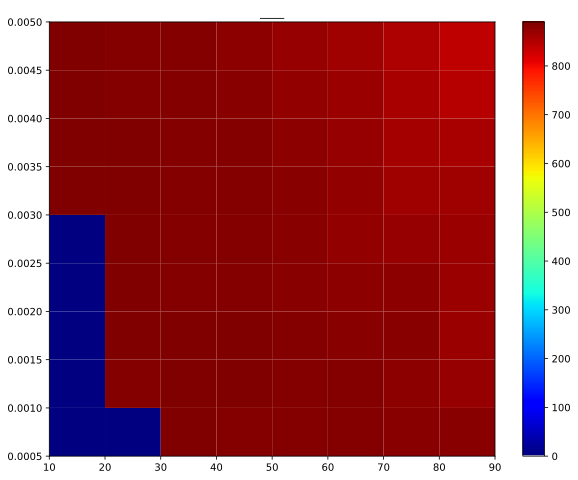

In [218]:
import matplotlib.pyplot as plt
import numpy as np

# generate 2 2d grids for the x & y bounds
# y, x = np.meshgrid(np.linspace(-3, 3, 10), np.linspace(-2, 2, 10))

# z = (1 - x / 2. + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)
# # x and y are bounds, so z should be the value *inside* those bounds.
# # Therefore, remove the last value from the z array.

z_min, z_max = np.min(z), np.abs(z).max()

fig, ax = plt.subplots(figsize=(10,8))

c = ax.pcolormesh(x, y, z, cmap='jet', vmin=z_min, vmax=z_max)
ax.set_title('____')
# set the limits of the plot to the limits of the data
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

plt.show()

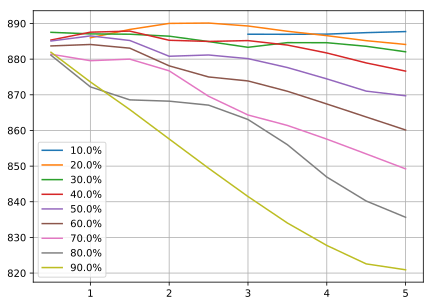

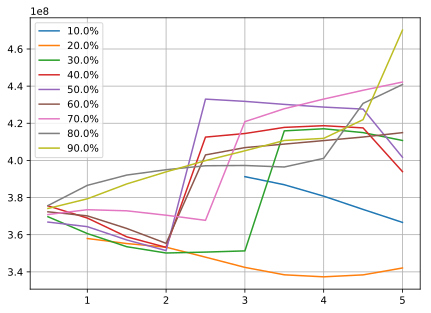

In [201]:
import matplotlib as mpl
%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 

mpl.rcParams['figure.figsize'] = (7,5) 

def add_one(perc, what):
    xs = np.array(ylim)
    ys = np.array([best_by_perc_m_dict[(perc, xx)][what] for xx in xs])
    xs = xs[ys>0]
    ys = ys[ys>0]
    plt.plot(xs*1000, ys, label=f'{perc}%')
for p in xlim:
    add_one(p, 'v_d')
plt.grid()
plt.legend()
plt.savefig('V2(m).png', dpi=300)
plt.show()

for p in xlim:
    add_one(p, 'p_max')
plt.grid()
plt.legend()
plt.savefig('p2(m).png', dpi=300)
plt.show()

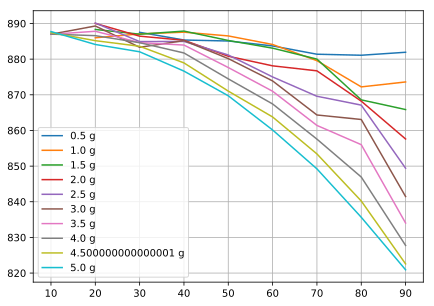

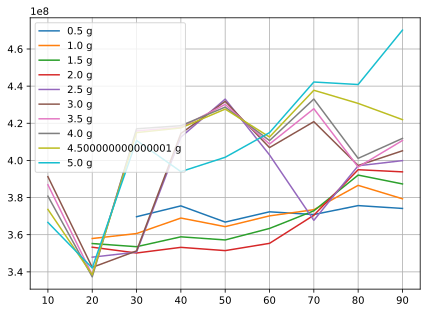

In [202]:
def add_one(m, what):
    xs = np.array(xlim)
    ys = np.array([best_by_perc_m_dict[(perc, m)][what] for perc in xs])
    xs = xs[ys>0]
    ys = ys[ys>0]
    plt.plot(xs, ys, label=f'{m*1000} g')
for p in ylim:
    add_one(p, 'v_d')
plt.grid()
plt.legend()
plt.savefig('V(perc).png', dpi=300)
plt.show()
for p in ylim:
    add_one(p, 'p_max')
plt.grid()
plt.legend()
plt.savefig('p(perc).png', dpi=300)
plt.show()

In [ ]:
%%px --local
import time
def tst_map_foo(t):
    time.sleep(t)
    return (t, t*t)

In [ ]:
times = np.random.normal(1, 0.2, size=15)

In [ ]:
rezs = lbv.map(tst_map_foo, times)

In [ ]:
from tqdm import tqdm_notebook
for r in tqdm_notebook(rezs):
    print(r)

In [ ]:
op = OptiPerson(cc)
wc = op.get_last()
wc = {'fitness': 2306.8139010783698,
 'name': 'Сильгелий',
 'chromo': {'om_1': 0.1476634224754327,
  'om_2': 0.04311749829311228,
  'm_1': 0.05922144933076293,
  'pf_1': 7991365.935986287,
  'delta_powder_1': 905.9686858122429,
  'delta_powder_2': 531.7852339315856,
  'powder_type_1': '4\\7',
  'powder_type_2': '4\\7',
  'p_ign_perc': 0.3703090621896885},
 'id': 0,
 'dop_info': None,
 'vec_param': np.array([ 0.97875839,  0.3679722 ,  0.30170346,  0.79710767,  0.90215264,
         0.07063385,  0.33788633]),
 'vec_struct': np.array([ 0.,  0.])}


In [ ]:
mainf(wc)

#### Фитнесс-функция

In [ ]:
%%px --local
def fitness_foo(wchr):
    def shtraf(p):
        p_shtraf = 4200E5
        if p < p_shtraf:
            return 0
        p_max = 7000E5
        v_shtraf = 2000
        k = v_shtraf / (p_max - p_shtraf)
        b = -k * p_shtraf
        return k * p + b

    tp = mainf(wchr, with_calc=True, print_gr=False)
    fitness = -9900
    if isinstance(tp, tuple):
        Vmax, pmax = tp
        fitness = Vmax - shtraf(pmax)
    return fitness


def fit_fun4tst(wc):
    time.sleep(rnd.random())
    return mainf(wc, with_calc=False, print_gr=True)

In [ ]:
fitness_foo(wc)

In [ ]:
%%px --local
wc = {'fitness': None,
 'name': 'Забина',
 'chromo': {'om_1': 0.06775975418500048,
  'om_2': 0.07099813620763305,
  'm_1': 0.10587159948906029,
  'pf_1': 5203778.656607398,
  'delta_powder_1': 766.0104637899715,
  'delta_powder_2': 602.197054404907,
  'powder_type_1': '4\\7',
  'powder_type_2': '6\\7 фл ',
  'p_ign_perc': 0.1343609331458672},
 'id': 0,
 'dop_info': None,
 'vec_param': np.array([ 0.2523614 ,  0.67775707,  0.66055077,  0.5155332 ,  0.59113436,
         0.22710457,  0.04295117]),
 'vec_struct': np.array([ 0.,  2.])}
fitness_foo(wc)

In [ ]:
def fit_func(wchromo):
    return wchromo, fitness_foo(wchromo)  #fit_fun4tst
#     return wchromo, fit_fun4tst(wchromo)

def ff_4clustycalc(wchromo):
#     print(f"{wchomo['name']}")
    return lbv.apply_async(fit_func, wchromo)

In [ ]:
import json
from opti.Generation import op_lst_to_dict
def add_result(res):
    try:
        fit, op = res
        if fit < 2400:
            return
        with open(f"jsons_pbu\\{int(fit)}_{op.name}.json", 'w') as openfile:
            json.dump(op.to_str(), openfile)
    except Exception as e:
        print(f"error save {e}")

In [ ]:
from rx.concurrency import CurrentThreadScheduler, ThreadPoolScheduler
from rx.subjects import Subject
from rx import Observable
from threading import Lock

from opti.SwarmNet import SwarmNet

mutex = Lock()
curr_tr_sched = CurrentThreadScheduler()
thr_pool_sched = ThreadPoolScheduler(len(cl[:]))

sub_new_jobs = Subject()
sub_done_jobs = Subject()
sub_freeworkers = Subject()
n_workers = len(cl[:])

def job_done(res):
    try:
        gp.on_next4sub_take_calced(res)
        sub_done_jobs.on_next(res)
    except Exception as e:
        print(f"error job done {e}")
    
def on_next_njob_map(wchr):
    res = ff_4clustycalc(wchr)
    return res

disposer4 = gp.sub_update_pop.subscribe(on_next=add_result, on_error=lambda e: print(f"disp4 {e}"))
disposer5 = sub_done_jobs\
    .buffer_with_count(100)\
    .map(lambda l: 100)\
    .scan(lambda x,y: x+y)\
    .subscribe(on_next=lambda x: print(f"Посчитано {x} вариантов"))

def dist_on_error(e):
    !telegram-send f"Error in 6 {e}"
    
def flat_map_fun(ar2):
    res = ar2.result()
    wchr = gp.get_new_wcr()
    sub_new_jobs.on_next(wchr)
    return res
    
    
disposer6 = sub_new_jobs\
    .map(on_next_njob_map)\
    .flat_map(lambda ar: Observable.just(ar).observe_on(thr_pool_sched).map(flat_map_fun))\
    .filter(lambda r: isinstance(r, tuple))\
    .retry(33)\
    .subscribe(on_next=job_done, on_error=dist_on_error)

disposers = [disposer5,disposer6,disposer4]

def stop():
    for d in disposers:
        d.dispose()
    lbv.abort()
    
def start(n=None):
    if not n:
        n = len(cl[:])
    for i in range(n):
        wchr = gp.get_new_wcr()
        sub_new_jobs.on_next(wchr)

In [ ]:
start()

In [ ]:
stop()

In [ ]:
gp.fit_threshold = 600

In [ ]:
op_b = gp.bests[-1][-1]
wc_b = op_b.get_best()
wc_b

In [ ]:
def save_op(op, folder='jsons_pbu'):
    try:
        fit = op.best_fitness
        fn = folder+f"\\{int(fit)}_{op.name}.json"
        with open(fn, 'w') as openfile:
            json.dump(op.to_str(), openfile)
        print(f'Saved {fn}')
    except Exception as e:
        print(f"error save {e}")

In [ ]:
# save_bests = gp.bests
# gp = GenerationP(cc,n_max)
# gp.bests = save_bests
gp.prob_cross = 0.33
gp.prob_mut = 0.95
gp.fit_threshold = 1500


In [ ]:
gp.prob_mut_gene = 0.2

In [ ]:
def improve(tp):
    print(tp)
    !telegram-send f"improve {tp}"
disp33 = gp.sub_update_best_op.map(lambda res: (res[0], res[1].name)).subscribe(improve)

In [ ]:
disp33.dispose()

In [ ]:
disp11 = gp.sub_update_pop.map(lambda res: (res[0], res[1].name)).subscribe(print)


In [ ]:
disp11.dispose()

In [ ]:
disp22 = sub_done_jobs.map(lambda r: (r[0]['name'], r[1])).subscribe(lambda tp: print(f"allz {tp}"))

In [ ]:
disp22.dispose()

In [ ]:
op_b = gp.bests[-1][-1]
op_b = OptiPerson(cc, op_b.get_best_chromo(),fitness=op_b.best_fitness)

In [ ]:
from rx.concurrency import CurrentThreadScheduler, ThreadPoolScheduler
from rx.subjects import Subject
from rx import Observable
from threading import Lock

from opti.SwarmNet import SwarmNet

mutex = Lock()
curr_tr_sched = CurrentThreadScheduler()
thr_pool_sched = ThreadPoolScheduler(len(cl[:]))

sub_new_jobs = Subject()
sub_done_jobs = Subject()
sub_freeworkers = Subject()
sub_improve = Subject()
n_workers = len(cl[:])

ddx = 0.0025
swn = SwarmNet(op_b, dx=ddx)

def job_done(res):
    try:
        if swn.take_calced_wchr_thread_save(*res):
            sub_improve.on_next(res[1])
            if swn.is_extremum():
                !telegram-send f"Extremum fit = {res[1]}, dx = {ddx}"
                sub_new_jobs.on_completed()
                return
        sub_done_jobs.on_next(res)
    except Exception as e:
        print(f"error job done {e}")
    
def on_next_njob_map(wchr):
    res = ff_4clustycalc(wchr)
    return res

# disposer4 = gp.sub_update_pop.subscribe(on_next=add_result, on_error=lambda e: print(f"disp4 {e}"))
disposer5 = sub_done_jobs\
    .buffer_with_count(100)\
    .map(lambda l: 100)\
    .scan(lambda x,y: x+y)\
    .subscribe(on_next=lambda x: print(f"Посчитано {x} вариантов"))

def dist_on_error(e):
    !telegram-send f"Error in 6 {e}"
    
def flat_map_fun(ar2):
    res = ar2.result()
    wchr = swn.get_wchr_4calc_thread_save()
    sub_new_jobs.on_next(wchr)
    return res
    
    
disposer6 = sub_new_jobs\
    .map(on_next_njob_map)\
    .flat_map(lambda ar: Observable.just(ar).observe_on(thr_pool_sched).map(flat_map_fun))\
    .filter(lambda r: isinstance(r, tuple))\
    .retry(33)\
    .subscribe(on_next=job_done, on_error=dist_on_error)

disposers = [disposer5,disposer6]#,disposer4]

def stop():
    for d in disposers:
        d.dispose()
    lbv.abort()
    
def start(n=None):
    if not n:
        n = len(cl[:])
    for i in range(n):
        wchr = swn.get_wchr_4calc_thread_save()
        sub_new_jobs.on_next(wchr)

In [ ]:
start()

In [ ]:
stop()

In [ ]:
disp111 = sub_improve.subscribe(print)

In [ ]:
disp111.dispose()

In [ ]:
swn.is_extremum()

In [ ]:
# reload
op_b = OptiPerson(cc, swn.get_best_cromo(), swn.fit_max)

In [ ]:
save_op(op_b)

In [ ]:
mainf(op_b.get_best())

In [ ]:
op_b.get_best_chromo()

In [ ]:
swn.all_dict